In [1]:
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs

In [2]:
df=pd.read_csv("All_stocks.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,Name
0,0,2023-03-24,160.25,59256340,158.86,160.3400,157.85,Apple
1,1,2023-03-23,158.93,67622060,158.83,161.5501,157.68,Apple
2,2,2023-03-22,157.83,75701810,159.30,162.1400,157.81,Apple
3,3,2023-03-21,159.28,73938290,157.32,159.4000,156.54,Apple
4,4,2023-03-20,157.40,73641420,155.07,157.8200,154.15,Apple


In [4]:
df.shape

(32094, 8)

In [5]:
df=df[df['Date']>="2021-01-01"]

In [6]:
df['Name'].unique()

array(['Apple', 'Amazon', 'Facebook', 'Google_classA', 'Google_classC',
       'Netflix'], dtype=object)

In [7]:
apple_df = df[df['Name'] == 'Apple']
amazon_df=df[df['Name'] == 'Amazon']
facebook_df=df[df['Name'] == 'Facebook']
google_classA_df=df[df['Name'] == 'Google_classA']
google_classC_df=df[df['Name'] == 'Google_classC']
netflix_df=df[df['Name'] == 'Netflix']

In [8]:
names=[apple_df,amazon_df,facebook_df,google_classA_df,google_classC_df,netflix_df]

In [9]:
apple_df = apple_df.drop(columns=apple_df.columns.difference(['Date', 'Close']))
amazon_df = amazon_df.drop(columns=amazon_df.columns.difference(['Date', 'Close']))
facebook_df = facebook_df.drop(columns=facebook_df.columns.difference(['Date', 'Close']))
google_classA_df = google_classA_df.drop(columns=google_classA_df.columns.difference(['Date', 'Close']))
google_classC_df = google_classC_df.drop(columns=google_classC_df.columns.difference(['Date', 'Close']))
netflix_df = netflix_df.drop(columns=netflix_df.columns.difference(['Date', 'Close']))

In [10]:
dfs = [apple_df, amazon_df, facebook_df, google_classA_df, google_classC_df, netflix_df]

# Loop over the data frames and set the same column as index for each one
for df in dfs:
    df.set_index('Date', inplace=True)

In [11]:
df_names = ["apple", "amazon", "facebook", "google_classA", "google_classC", "netflix"]

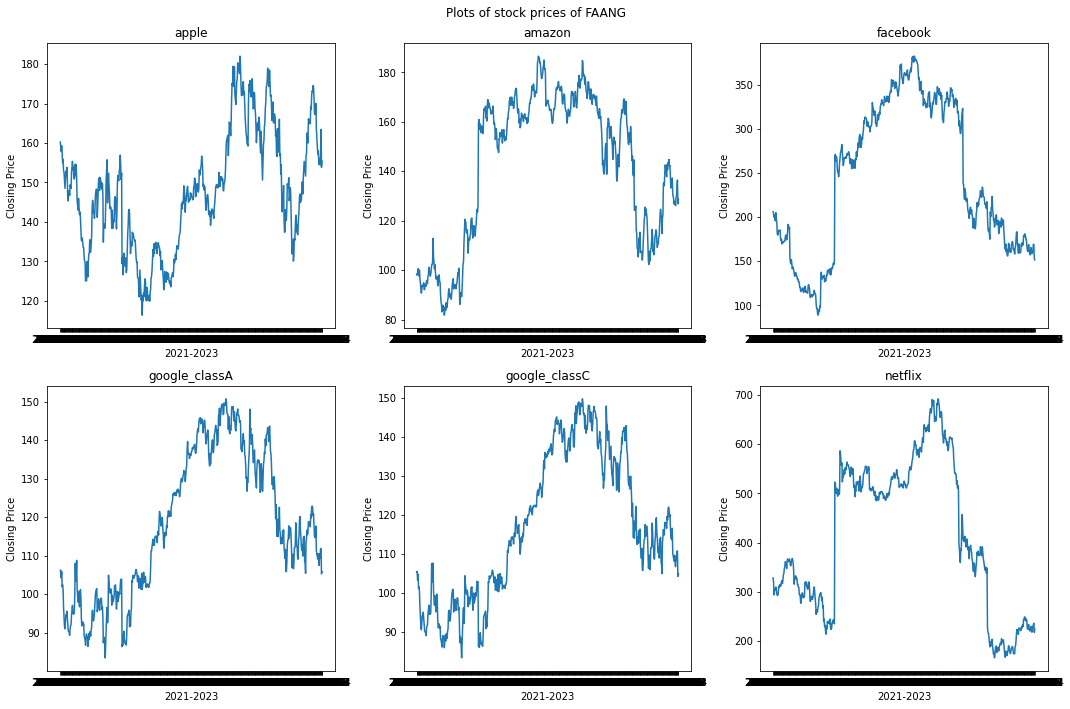

In [12]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop over the data frames and plot each one on a different subplot
for i, df in enumerate(dfs):
    row = i // 3
    col = i % 3
    axs[row, col].plot(df.index, df['Close'])
    axs[row, col].set_title('{}'.format(df_names[i]))
    axs[row, col].set_xlabel('2021-2023')
    axs[row, col].set_ylabel('Closing Price')

# Set overall plot title
fig.suptitle('Plots of stock prices of FAANG')

# Adjust subplot spacing
fig.tight_layout()

# Show the plot
plt.show()

In [13]:
def adf_test(dataframe, company):
    result = adfuller(dataframe['Close'])
    print('=========For {}========='.format(company))
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

In [14]:
dfs = [apple_df, amazon_df, facebook_df, google_classA_df, google_classC_df, netflix_df]

In [15]:
adf_test(apple_df, 'Apple')
adf_test(amazon_df, 'Amazon')
adf_test(facebook_df, 'Facebook')
adf_test(google_classA_df, 'Google_classA')
adf_test(google_classC_df ,'Google_classC')
adf_test(netflix_df, 'Netflix')

=========For Apple=========
ADF Statistic: -2.4075974245271077
p-value: 0.13960356378731842
=========For Amazon=========
ADF Statistic: -1.7429028663745498
p-value: 0.409154104545008
=========For Facebook=========
ADF Statistic: -1.019088343555882
p-value: 0.7462387585250105
=========For Google_classA=========
ADF Statistic: -1.5679490097737145
p-value: 0.4996708426716172
=========For Google_classC=========
ADF Statistic: -1.5668942556321759
p-value: 0.5001989876303814
=========For Netflix=========
ADF Statistic: -1.1260273017176188
p-value: 0.704581715912324


In [16]:
def get_degree_of_differencing(dataframe, company):
    company_ndiffs = ndiffs(dataframe['Close'], test = 'adf')
    print(f'The degree of differencing is {company_ndiffs} for {company}')
    return company_ndiffs

In [17]:
aapl_dd = get_degree_of_differencing(apple_df, 'Apple')
amzn_dd = get_degree_of_differencing(amazon_df, 'Amazon')
fcbk_dd = get_degree_of_differencing(facebook_df, 'Facebook')
googA_dd = get_degree_of_differencing(google_classA_df, 'Google class A')
googC_dd = get_degree_of_differencing(google_classC_df ,'Google class C')
ntfx_dd = get_degree_of_differencing(netflix_df, 'Netlfix')

The degree of differencing is 1 for Apple
The degree of differencing is 1 for Amazon
The degree of differencing is 1 for Facebook
The degree of differencing is 1 for Google class A
The degree of differencing is 1 for Google class C
The degree of differencing is 1 for Netlfix


In [18]:
def arima_split(dataframe, company):
    size = int(len(dataframe) * 0.95)
    train = (dataframe['Close'])[:size]
    test = (dataframe['Close'])[size:]
    
    print('=========For {}========='.format(company))
    print('Train Size: {}, Test Size: {}'.format(len(train), len(test)))
    
    return train, test

In [19]:
aapl_train, aapl_test = arima_split(apple_df, 'Apple')
amzn_train, amzn_test = arima_split(amazon_df, 'Amazon')
meta_train, meta_test = arima_split(facebook_df, 'Facebook')
googA_train, googA_test = arima_split(google_classA_df, 'Google class A')
googC_train, googC_test = arima_split(google_classC_df, 'Google class C')
ntfx_train, ntfx_test = arima_split(netflix_df, 'Netlfix')

=========For Apple=========
Train Size: 532, Test Size: 28
=========For Amazon=========
Train Size: 532, Test Size: 28
=========For Facebook=========
Train Size: 532, Test Size: 28
=========For Google class A=========
Train Size: 532, Test Size: 28
=========For Google class C=========
Train Size: 532, Test Size: 28
=========For Netlfix=========
Train Size: 532, Test Size: 28


In [20]:
aapl_train

Date
2023-03-24    160.25
2023-03-23    158.93
2023-03-22    157.83
2023-03-21    159.28
2023-03-20    157.40
               ...  
2022-07-29    162.51
2022-08-01    161.51
2022-08-02    160.01
2022-08-03    166.13
2022-08-04    165.81
Name: Close, Length: 532, dtype: float64

In [21]:
aapl_test

Date
2022-08-05    165.35
2022-08-08    164.87
2022-08-09    164.92
2022-08-10    169.24
2022-08-11    168.49
2022-08-12    172.10
2022-08-15    173.19
2022-08-16    173.03
2022-08-17    174.55
2022-08-18    174.15
2022-08-19    171.52
2022-08-22    167.57
2022-08-23    167.23
2022-08-24    167.53
2022-08-25    170.03
2022-08-26    163.62
2022-08-29    161.38
2022-08-30    158.91
2022-08-31    157.22
2022-09-01    157.96
2022-09-02    155.81
2022-09-06    154.53
2022-09-07    155.96
2022-09-08    154.45
2022-09-09    157.37
2022-09-12    163.43
2022-09-13    153.84
2022-09-14    155.43
Name: Close, dtype: float64

In [22]:
def find_best_fit_arima(data, company):
    print('=========For {}========='.format(company))

    model = auto_arima(data, test = 'adf', 
                          start_p = 1, start_q = 1,     
                          max_p = 3, max_q = 3, d= None,
                          seasonal = True,   
                          start_P = 0, m = 12,
                          trace = True, error_action = 'ignore',  
                          suppress_warnings = True, stepwise = True,
                          D = 1, information_criterion = 'aic')

    print(model.summary())
    print('\n')
    
    return model

In [23]:
aapl_arima_model = find_best_fit_arima(aapl_train, 'Apple')
amzn_arima_model = find_best_fit_arima(amzn_train, 'Amazon')
meta_arima_model = find_best_fit_arima(meta_train, 'Facebook')
googA_arima_model = find_best_fit_arima(googA_train, 'Google class A')
googC_arima_model = find_best_fit_arima(googC_train, 'Google class C')
ntfx_arima_model = find_best_fit_arima(ntfx_train, 'Netlfix')

=========For Apple=========
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3823.733, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2818.157, Time=1.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3364.792, Time=1.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3821.763, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2962.984, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2759.908, Time=4.76 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3816.498, Time=4.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2761.879, Time=4.62 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2761.880, Time=4.09 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=3368.556, Time=5.06 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=16.04 sec
 ARIMA(1,0

In [35]:
def check_model_params(model, company):
    print('The best parameters for {} are {}'.format(company, model))
    print('==================')
    

In [36]:
check_model_params(aapl_arima_model, 'Apple')
check_model_params(amzn_arima_model, 'Amazon')
check_model_params(meta_arima_model, 'Facebook')
check_model_params(googA_arima_model, 'Google Class A')
check_model_params(googC_arima_model, 'Google Class C')
check_model_params(ntfx_arima_model, 'Netflix')

The best parameters for Apple are  ARIMA(1,0,0)(2,1,0)[12]          
The best parameters for Amazon are  ARIMA(2,0,1)(2,1,0)[12]          
The best parameters for Facebook are  ARIMA(1,0,0)(2,1,0)[12]          
The best parameters for Google Class A are  ARIMA(1,0,0)(2,1,0)[12]          
The best parameters for Google Class C are  ARIMA(1,0,0)(2,1,0)[12]          
The best parameters for Netflix are  ARIMA(1,0,0)(2,1,0)[12]          


In [37]:
def make_predictions_and_print_rmse(model, test_data, company):
    print('=========For {}========='.format(company))
    
    forecast = model.predict(n_periods=len(test_data))   
    print('MSE: %.2f' % mean_squared_error(test_data, forecast)) 
  
    
    return forecast

In [38]:
forecast_aapl = make_predictions_and_print_rmse(aapl_arima_model, aapl_test, 'Apple')
forecast_amzn= make_predictions_and_print_rmse(amzn_arima_model, amzn_test, 'Amazon')
forecast_meta = make_predictions_and_print_rmse(meta_arima_model, meta_test, 'Facebook')
forecast_googA = make_predictions_and_print_rmse(googA_arima_model, googA_test, 'Google Class A')
forecast_googC= make_predictions_and_print_rmse(googC_arima_model, googC_test, 'Google Class C')
forecast_ntfx = make_predictions_and_print_rmse(ntfx_arima_model, ntfx_test, 'Netflix')

=========For Apple=========
MSE: 71.59
=========For Amazon=========
MSE: 111.46
=========For Facebook=========
MSE: 110.92
=========For Google Class A=========
MSE: 37.37
=========For Google Class C=========
MSE: 38.81
=========For Netflix=========
MSE: 207.94


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_mode

In [39]:
def plot(train_data,test_data,predicted_data,Company):
  #plt.plot(train_data.index, train_data, label='Actual (training)')
  plt.figure(figsize=(20, 6))
  plt.plot(test_data.index, test_data, label='Actual (test)')
  plt.plot(test_data.index, predicted_data, label='Predicted (test)')
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Stock Price')
  plt.title('{} Stock Price Prediction'.format(Company))
  plt.xticks(rotation=90)
  plt.show()

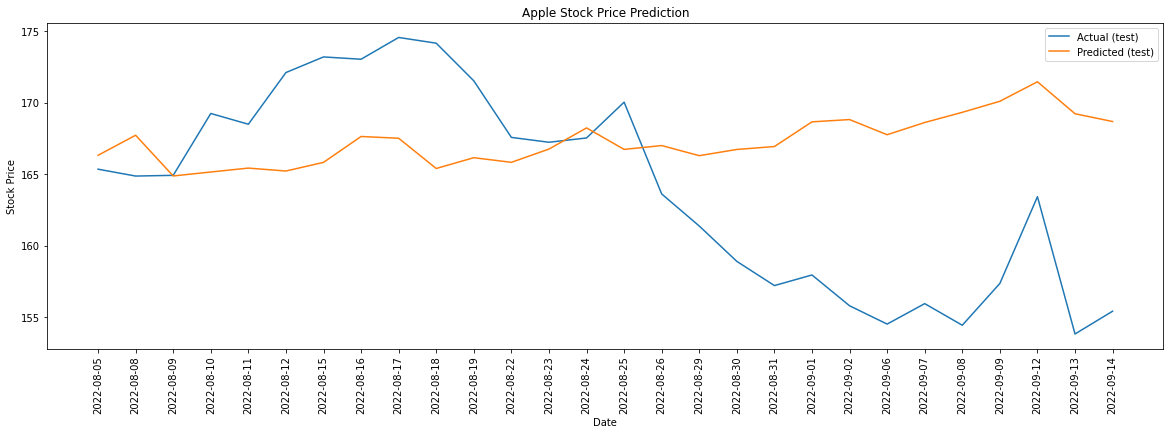

In [40]:
plot(aapl_train,aapl_test,forecast_aapl,"Apple")

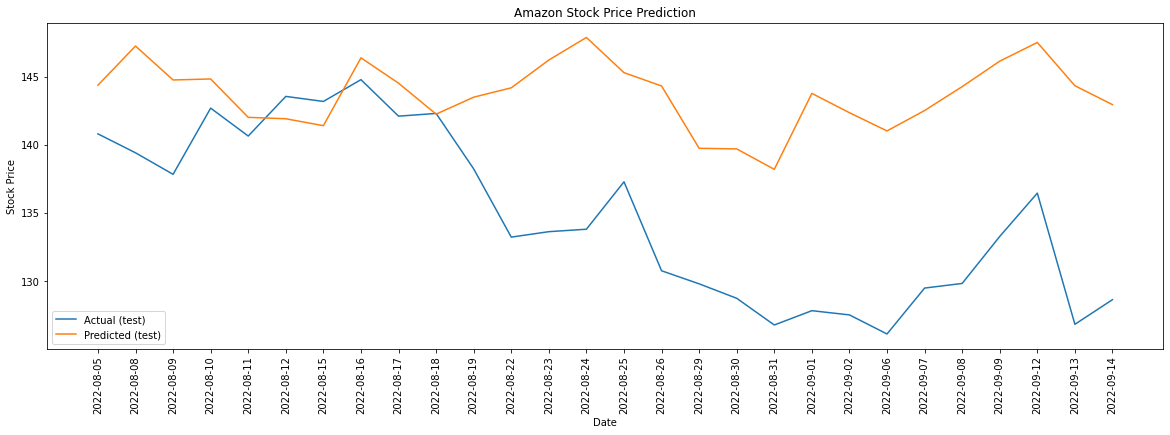

In [41]:
plot(amzn_train,amzn_test,forecast_amzn,"Amazon")

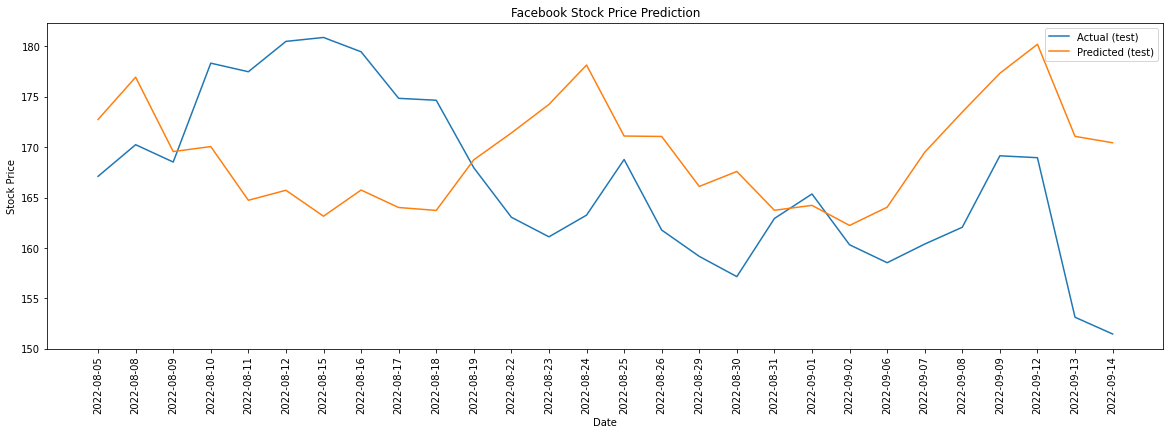

In [42]:
plot(meta_train,meta_test,forecast_meta,"Facebook")

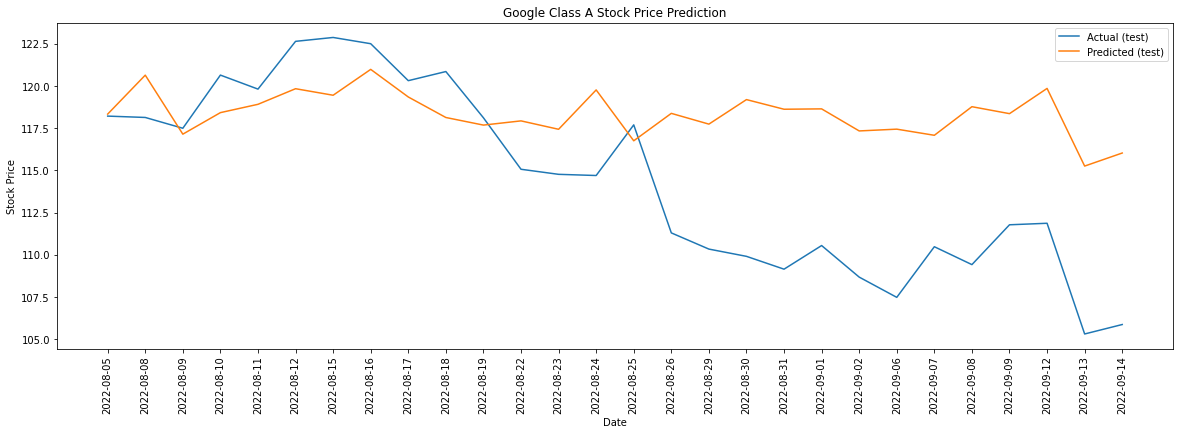

In [43]:
plot(googA_train, googA_test,forecast_googA,"Google Class A")

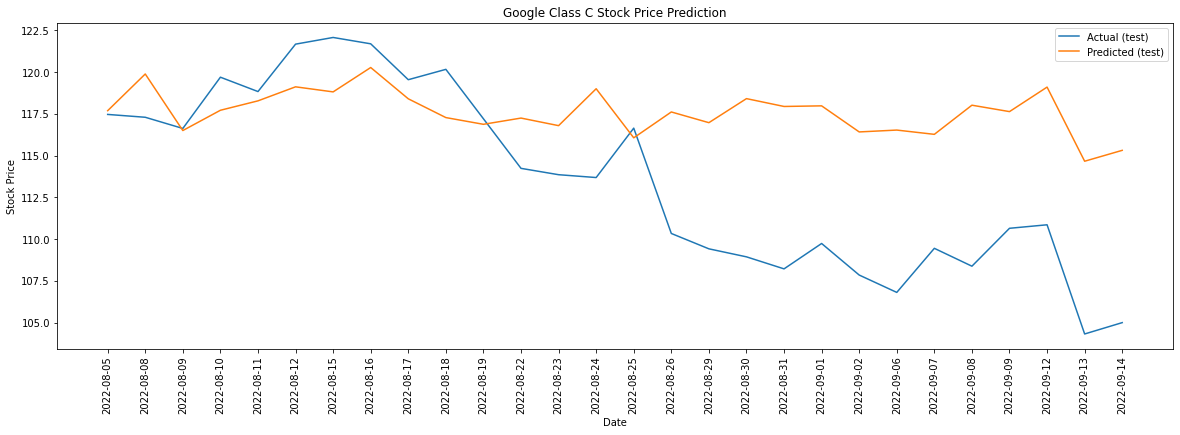

In [44]:
plot(googC_train, googC_test,forecast_googC,"Google Class C")

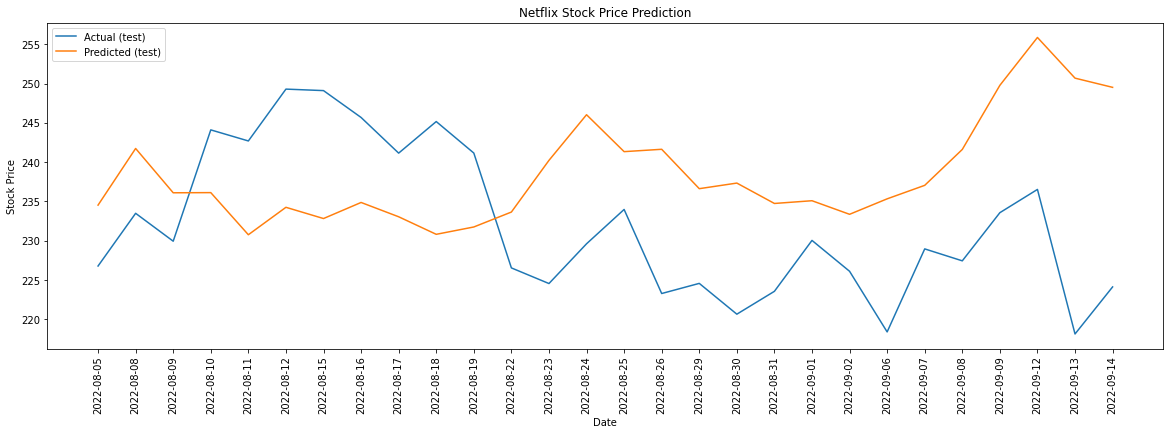

In [45]:
plot(ntfx_train, ntfx_test,forecast_ntfx,"Netflix")